In [1]:
import json
from PIL import Image, ImageDraw
import requests
from io import BytesIO
import pandas as pd
import uuid
import numpy as np
import cv2

In [2]:
class Page:
    def __init__(self,input_file,local=False):
        self.file = input_file
        self.local = local
        self.get_json()
        
    def get_json(self):
        if self.local :
            with open(self.file) as f :
                self.json = json.load(f)
        else :
            file_name = self.file['input']['name']
            r = requests.get('https://auth.anuvaad.org/download/' + file_name)
            self.json = r.json()
        
    def get_page(self,page_index):
        page_path = self.json['rsp']['outputs'][0]['page_info'][page_index]
        page_path = '/'.join(page_path.split('/')[1:])
        page_request = requests.get('https://auth.anuvaad.org/download/' + page_path)
        return page_request.content
    
#     def get_page_path(self,page_index):
#         return self.json['rsp']['outputs'][0]['page_info'][page_index]
        
        
        

In [3]:
def draw_box(page_image,compare_corrds, save=False):
    
    #image = Image.open(BytesIO(page_image))
    image = Image.open(page_image)
   
    draw   = ImageDraw.Draw(image)
    
    for region in compare_corrds :
        if region['ground'] != None :
            ground = region['ground']['boundingBox']['vertices']
            draw.rectangle(((ground[2]['x'],  ground[2]['y']), (ground[0]['x'],ground[0]['y'])), outline= 'red',width=5)

        if region['input'] != None:
            inpu_t = region['input']['boundingBox']['vertices']
            draw.rectangle(((inpu_t[2]['x'],  inpu_t[2]['y']), (inpu_t[0]['x'],inpu_t[0]['y'])), outline= 'blue',width=5)

    #save_filepath = os.path.join(os.path.dirname(filepath), 'processed_' + os.path.basename(filepath))
    if save:
        image.save(str(uuid.uuid1()) + '.png')
    
    return image



def draw_region(page_image,corrds,color='red',  save=False):
    
    #image = Image.open(BytesIO(page_image))
    image = Image.open(page_image)
   
    draw   = ImageDraw.Draw(image)
    
    for region in corrds :
       
            ground = region['boundingBox']['vertices']
            draw.rectangle(((ground[2]['x'],  ground[2]['y']), (ground[0]['x'],ground[0]['y'])), outline= color,width=5)

    if save:
        image.save(str(uuid.uuid1()) + '.png')
    
    return image

In [4]:
#eval_path = '/home/dhiraj/Documents/anuvaad/anuvaad-etl/anuvaad-extractor/document-processor/evaluator/upload/0-1606481427232606.json'
image_base_path = '/home/dhiraj/Documents/anuvaad/anuvaad-etl/anuvaad-extractor/document-processor/word-detector/craft/'

input_path = '/home/dhiraj/Documents/anuvaad/anuvaad-etl/anuvaad-extractor/document-processor/word-detector/craft/upload/0-16067465740941305.json'
ground_path = '/home/dhiraj/Documents/anuvaad/anuvaad-etl/anuvaad-extractor/document-processor/ocr/google/upload/0-16067323020844543.json'

eval_path = '/home/dhiraj/Documents/anuvaad/anuvaad-etl/anuvaad-extractor/document-processor/evaluator/upload/0-1606746943858071.json'

In [5]:

with open(eval_path) as f :
    eval_data = json.load(f)
 

In [6]:
with open(input_path) as f :
    input_data = json.load(f)


In [7]:
with open(ground_path) as f :
    ground_data= _data = json.load(f)




In [8]:
file_index = 2
page_index = 0

input_file  = eval_data['rsp']['inputs'][0]
#page_data = Page(input_file,local=True)
#page_image = page_data.get_page(page_index)

page_image = input_data['rsp']['outputs'][file_index]['page_info'][page_index]
compare_corrds =   eval_data['rsp']['outputs'][file_index][page_index]

KeyError: 0

In [9]:
iou_stats = []

for file_index in range(len(eval_data['rsp']['outputs'])) :
    for page_index in range(len(eval_data['rsp']['outputs'][file_index]['pages'])):
        page_image = input_data['rsp']['outputs'][file_index]['page_info'][page_index]
        compare_corrds =   eval_data['rsp']['outputs'][file_index]['pages'][page_index]
        
        gt_image = draw_region(image_base_path + page_image,ground_data['rsp']['outputs'][file_index]['pages'][page_index]['words'])
        craft_image = draw_region(image_base_path + page_image,input_data['rsp']['outputs'][file_index]['pages'][page_index]['words'] ,color='blue')
        comapre_image = draw_box(image_base_path + page_image,compare_corrds)
        compare_df = pd.DataFrame(compare_corrds)
        print(compare_df['iou'].mean())
        iou_stats.append(compare_df['iou'].mean())
        stiched_image = np.hstack([np.array(gt_image) , np.array(comapre_image) ,np.array(craft_image)])
        
        cv2.imwrite(str(uuid.uuid1()) + '.png', stiched_image)

0.5036370285005956
0.596914331076525
0.6246971532915176
0.5424381227153756
0.5575604059387527
0.5485543730261239
0.5943804339737555
0.6731481219035321
0.5769426378134691
0.5839788432017801
0.6676718033712223
0.6879190446933335
0.5731670231767895
0.5801987258267257
0.5901110920900879
0.38902491717860144
0.5584404078149451
0.6809534628249947


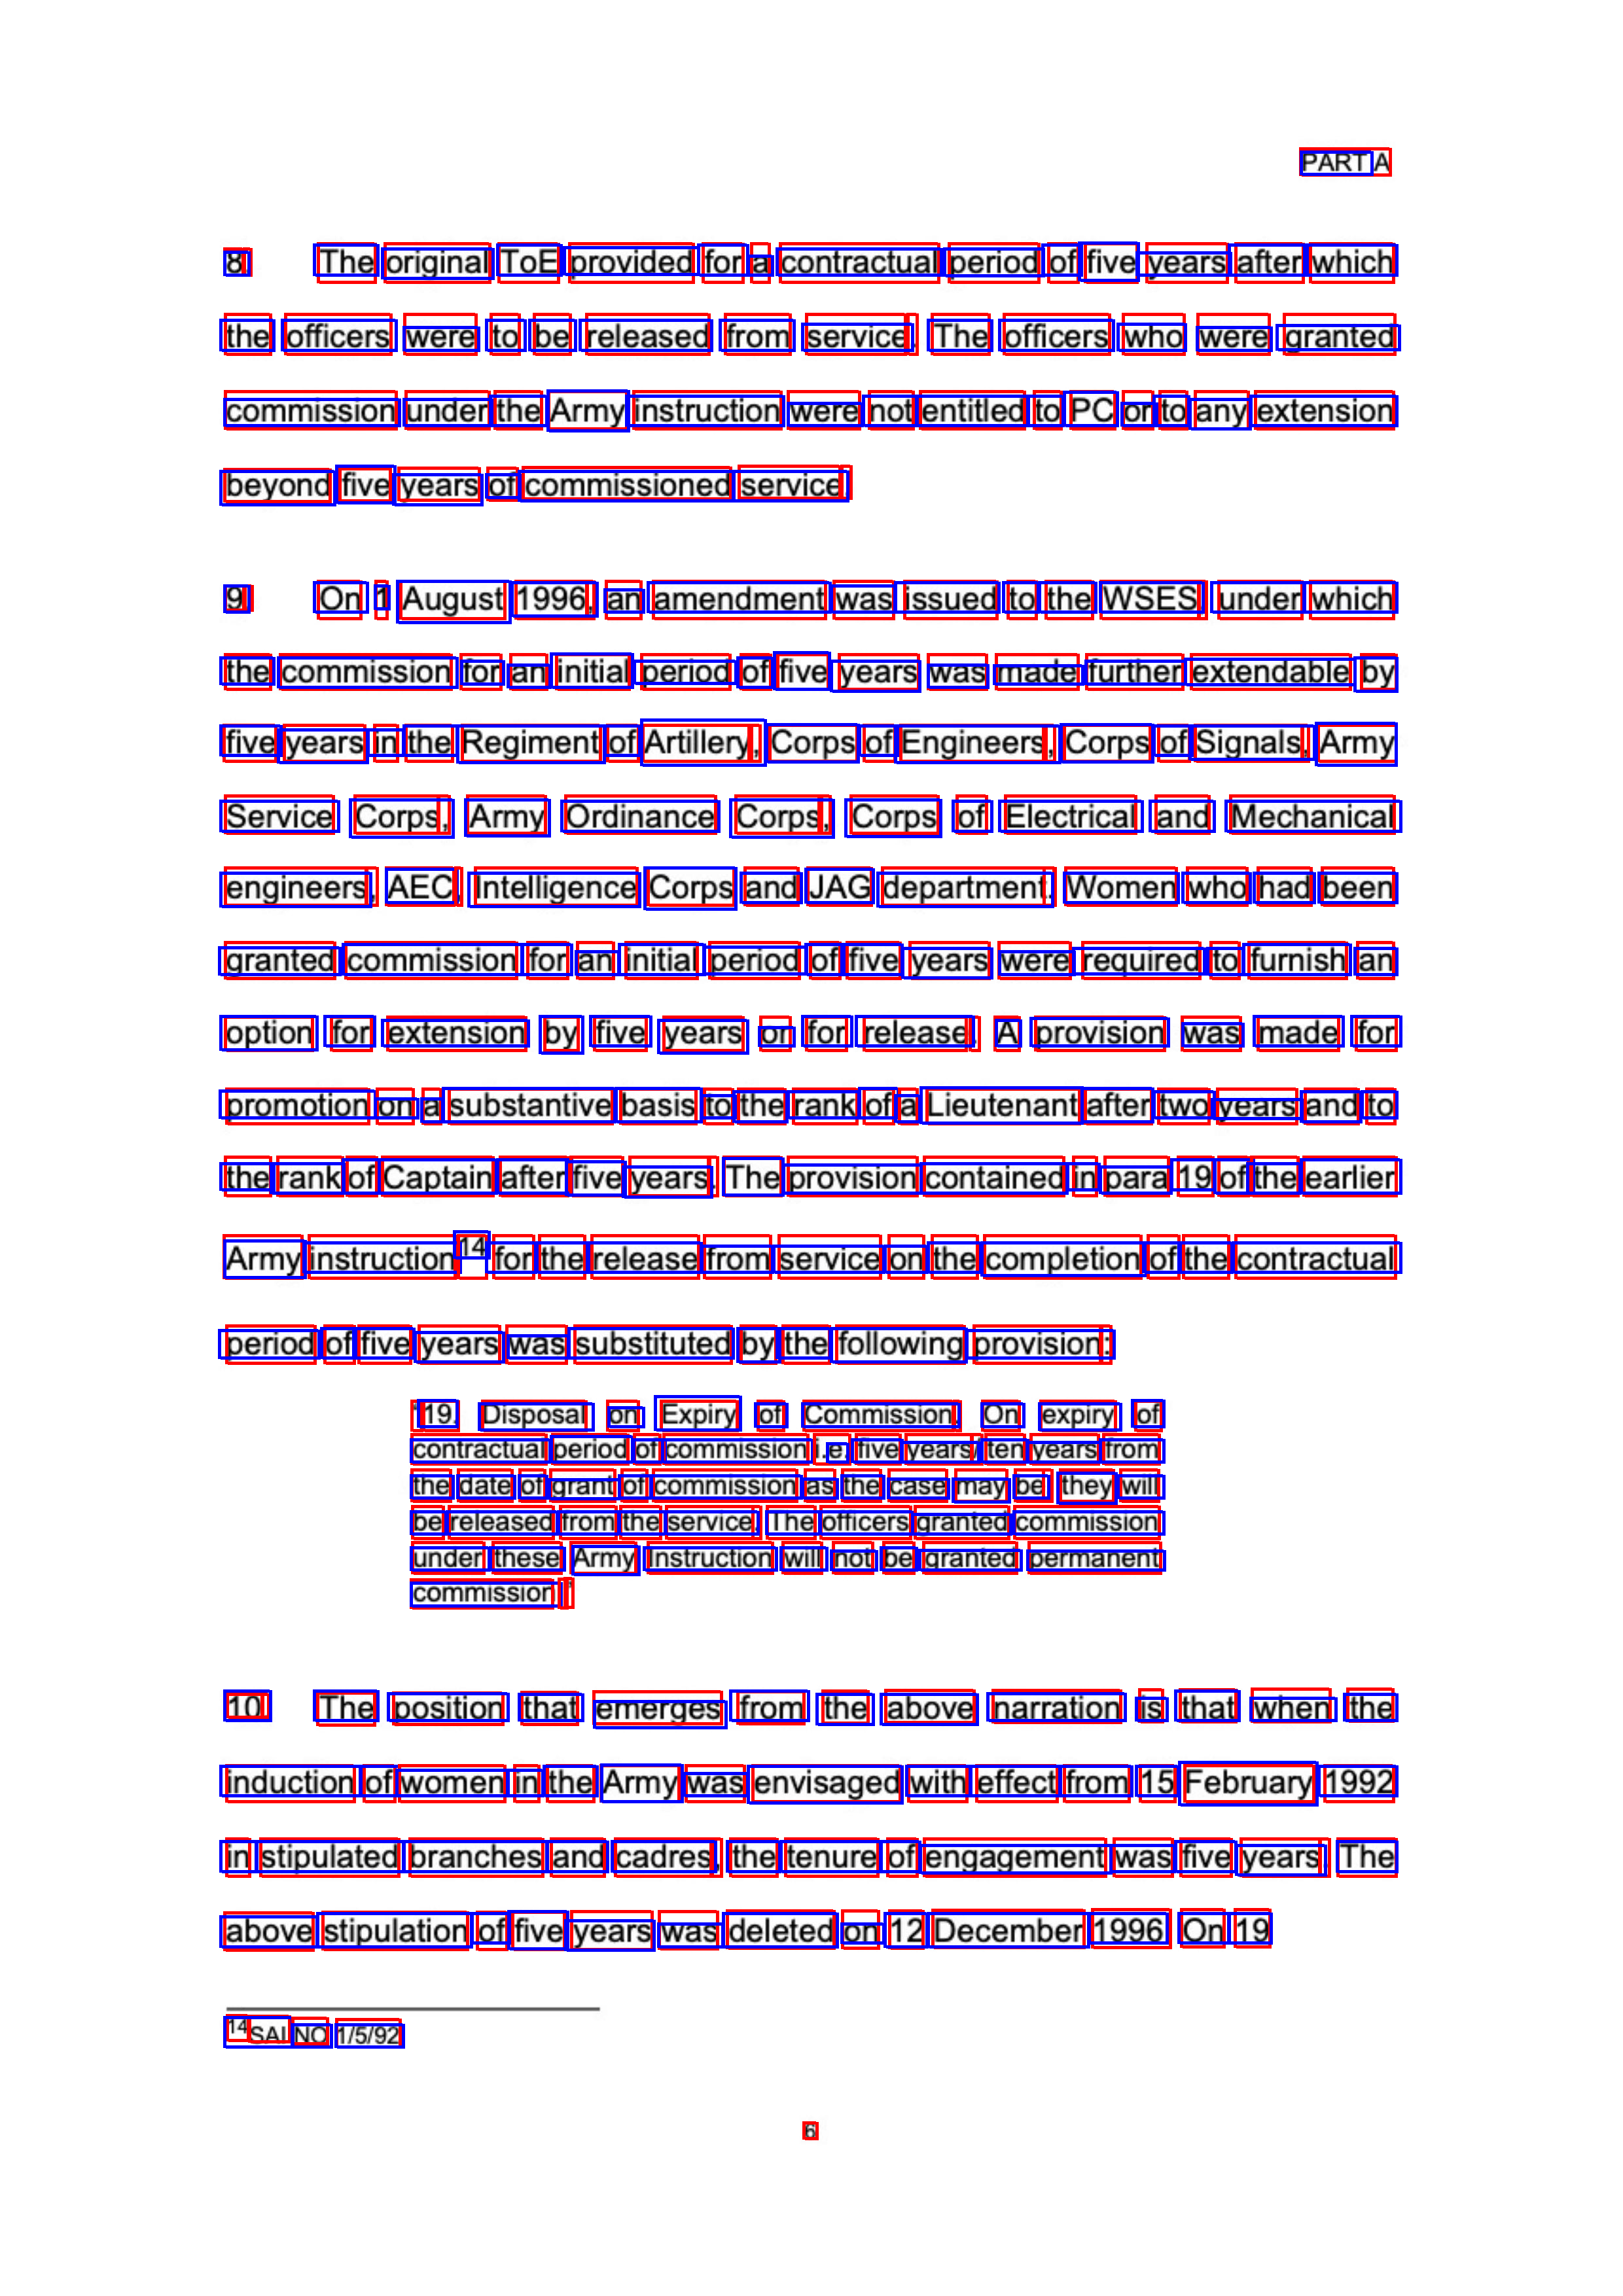

In [25]:
comapre_image

In [23]:

compare_df = pd.DataFrame(compare_corrds)

In [27]:
compare_df['iou'].mean()

0.6512537552823257

In [45]:
len(eval_data['rsp']['outputs']) #[file_index]

1

In [50]:
eval_data['rsp'].keys()

dict_keys(['inputs', 'jobID', 'state', 'status', 'stepOrder', 'workflowCode', 'taskID', 'tool', 'message', 'metadata', 'outputs'])

In [12]:
y =0.5849854404676739

2* y /( 1  +y)

0.7381587559505468

In [13]:
np.mean(iou_stats)

0.5849854404676739

In [11]:
np.mean(iou_stats)

0.5849854404676739

In [10]:
8,2,4

0.5331896355570389
0.5911757986732217
0.6203633723763122
0.5620582149400676
0.5488797296908341
0.535142327697838
0.6078407486631073
0.6884819741198223
0.5666216307191195
0.5940801542905321
0.6866600642338573
0.7034852042635412
0.5347262928269113
0.6035566594439823
0.5596672386558638
0.4062571461792611
0.5422557423269335
0.6512537552823257

0.5036370285005956
0.596914331076525
0.6246971532915176
0.5424381227153756
0.5575604059387527
0.5485543730261239
0.5943804339737555
0.6731481219035321
0.5769426378134691
0.5839788432017801
0.6676718033712223
0.6879190446933335
0.5731670231767895
0.5801987258267257
0.5901110920900879
0.38902491717860144
0.5584404078149451
0.6809534628249947


0.6809534628249947